# Data preparation

### Project members:
- Marlene Ibrus
- Maare Karmen Oras
- Mykhailo Dorokhov
- Aleksandr Volžinski

## I. Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## II. Load data

### Customers

In [2]:
df_customer = pd.read_csv('../Data/synthetic_sme_customers_processed.csv')
df_customer.head()

,cust_id,customer_type,parent_company_flag,CUST_GRP_ID,BRTH_DT,language
0,3caf82febb1d4e64b140893d9e89d748115ec5b70455e1...,SME,0,eefcfda39744d0f4c7d1f1f6f13a53dbf49f7281de5de0...,2005-2009,ENG
1,fd0d32ecf697980ff5b750d18fe6f8e9f96f2e31fba130...,SME,1,NaN,2015-2019,EST
2,320b10457c9c109c2b4f00b0fecac1cc8cb7c2da8ad936...,SME,1,NaN,2020-2024,EST
3,d4d7e033ed758bb075ad96435d4afb505b7a4059aa3f37...,SME,1,NaN,2020-2024,EST
4,e9b8374b1f3ae04cc65672bc5907726d962edb35e05736...,SME,1,NaN,2020-2024,EST


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cust_id              1000 non-null   object
 1   customer_type        1000 non-null   object
 2   parent_company_flag  1000 non-null   int64 
 3   CUST_GRP_ID          348 non-null    object
 4   BRTH_DT              1000 non-null   object
 5   language             1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
df_customer.describe(include='all')

,cust_id,customer_type,parent_company_flag,CUST_GRP_ID,BRTH_DT,language
count,1000,1000,1000.000000,348,1000,1000
unique,1000,1,NaN,343,11,3
top,3caf82febb1d4e64b140893d9e89d748115ec5b70455e1...,SME,NaN,a412ea95ea5905ca8b95151e3ae443493f6a0c011f4a05...,2015-2019,EST
freq,1,1000,NaN,4,249,816
mean,NaN,NaN,0.653000,NaN,NaN,NaN
std,NaN,NaN,0.476254,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN


In [7]:
df_customer.isna().sum()
df_customer.duplicated(subset='cust_id').sum()


0

In [10]:
df_customer['parent_company_flag'].value_counts(normalize=True)

1    0.653
0    0.347
Name: parent_company_flag, dtype: float64

In [11]:
df_customer['CUST_GRP_ID'].isna().mean()  # % without group
df_customer['CUST_GRP_ID'].nunique()      # number of groups
df_customer.groupby('CUST_GRP_ID')['cust_id'].count().describe()

count    343.000000
mean       1.014577
std        0.178747
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: cust_id, dtype: float64

In [13]:
df_customer['BRTH_DT'].value_counts().sort_index()

1900-1904      5
1915-1919      1
1965-1969      1
1970-1974      2
1990-1994     17
1995-1999    163
2000-2004    113
2005-2009    164
2010-2014    198
2015-2019    249
2020-2024     87
Name: BRTH_DT, dtype: int64

In [15]:
df_customer['language'].value_counts(normalize=True)

EST    0.816
RUS    0.151
ENG    0.033
Name: language, dtype: float64

### Transactions

In [6]:
df_transaction = pd.read_csv('../Data/synthetic_sme_transactions_processed.csv')
df_transaction.head()

/var/folders/c1/zlv4qgz53c73nd0k2ttg_hf40000gn/T/ipykernel_47754/972457316.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction = pd.read_csv('../Data/synthetic_sme_transactions_processed.csv')


,WeekDay,Channel,cust_id,D_C,Currency_trx,Amount_EUR,Customer_IBAN,Counterparty_IBAN,Amount_Orig,currency,MCC,country_of_merchant,BookingDatetime
0,5,POS,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,7.518036,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,7.518036,EUR,5271.0,EE,2023-01-27 10:00:28
1,2,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,0.200481,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,0.200481,EUR,NaN,NaN,2023-01-17 02:14:14
2,3,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,1.002405,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,1.002405,EUR,NaN,NaN,2023-02-08 02:00:18
3,7,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,C,EUR,0.010024,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,0.010024,EUR,NaN,NaN,2023-01-01 03:56:39
4,3,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,1.002405,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,1.002405,EUR,NaN,NaN,2023-03-08 02:06:48


#### Extracting mored DateTime info

In [18]:
df_transaction['BookingDatetime'] = pd.to_datetime(df_transaction['BookingDatetime'])
df_transaction['Year'] = df_transaction['BookingDatetime'].dt.year
df_transaction['Month'] = df_transaction['BookingDatetime'].dt.month
df_transaction['Day'] = df_transaction['BookingDatetime'].dt.day
df_transaction['Hour'] = df_transaction['BookingDatetime'].dt.hour

In [20]:
df_transaction.head()

,WeekDay,Channel,cust_id,D_C,Currency_trx,Amount_EUR,Customer_IBAN,Counterparty_IBAN,Amount_Orig,currency,MCC,country_of_merchant,BookingDatetime,Year,Month,Day,Hour
0,5,POS,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,7.518036,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,7.518036,EUR,5271.0,EE,2023-01-27 10:00:28,2023,1,27,10
1,2,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,0.200481,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,0.200481,EUR,NaN,NaN,2023-01-17 02:14:14,2023,1,17,2
2,3,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,1.002405,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,1.002405,EUR,NaN,NaN,2023-02-08 02:00:18,2023,2,8,2
3,7,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,C,EUR,0.010024,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,0.010024,EUR,NaN,NaN,2023-01-01 03:56:39,2023,1,1,3
4,3,Internet Bank,00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8f...,D,EUR,1.002405,3a8c99d1e8caf60ddbc4b9865b0947f981c90980f3fab2...,7ecc6d620a9ea4170231178c236206770eb7a4785d2a6c...,1.002405,EUR,NaN,NaN,2023-03-08 02:06:48,2023,3,8,2


#### Transaction Frequency per Customer

In [21]:
df_transaction.groupby('cust_id').size().describe()

count       958.000000
mean       2653.461378
std       12177.677577
min          12.000000
25%         378.500000
50%         858.000000
75%        1887.500000
max      276228.000000
dtype: float64

#### Incoming vs Outgoing Transactions

In [22]:
df_transaction['D_C'].value_counts(normalize=True)

C    0.50993
D    0.49007
Name: D_C, dtype: float64

In [23]:
df_transaction.pivot_table(index='cust_id', columns='D_C', values='Amount_EUR', aggfunc='count')

D_C,C,D
cust_id,,
00feb0ff373287a3b1b210369f5aef9bfffd5d02f6bc8fb9b42ef724881f8f90,238,414
015a03199023ec1485bd99e3f6743aac4e0917404e2c153bcb8ddf52aae24748,298,406
01964c2a2101c91f297b2b3685320cbd5bf62192a0d28e62ccd80d1f2ba09482,398,262
01a37f0fbc7245a14b2dee8b1a3146ac52a3f0a8b89d5fe0f7f14041834f6a24,1012,360
02275ff8fd6178d1c5bee68c939abdeae4485a3aeb460ea5fabd4a4dda52ff3e,72,446
...,...,...
fe75ad9c28cfddb26b24d3d694ac6c1c449f1409b14090e8a5e334c38a4a2edd,41468,6152
fed3cf69a004eda573d0922299398f8867d340a7342e67bf3e1e82e93e06bcd9,126,868
fedd8ec9267c5e537ccd33cc9aae6690be53e336df5423016d9dc5f9364f1f0d,1242,402


#### Money Flow Analysis

In [24]:
money_flow = df_transaction.pivot_table(
    index='cust_id',
    columns='D_C',
    values='Amount_EUR',
    aggfunc='sum'
).fillna(0)

money_flow['Net_Flow'] = money_flow.get('D', 0) - money_flow.get('C', 0)

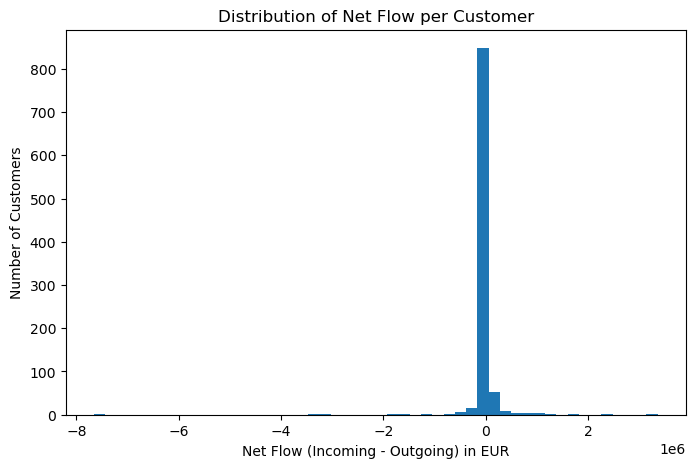

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(money_flow['Net_Flow'], bins=50)
plt.title("Distribution of Net Flow per Customer")
plt.xlabel("Net Flow (Incoming - Outgoing) in EUR")
plt.ylabel("Number of Customers")
plt.show()

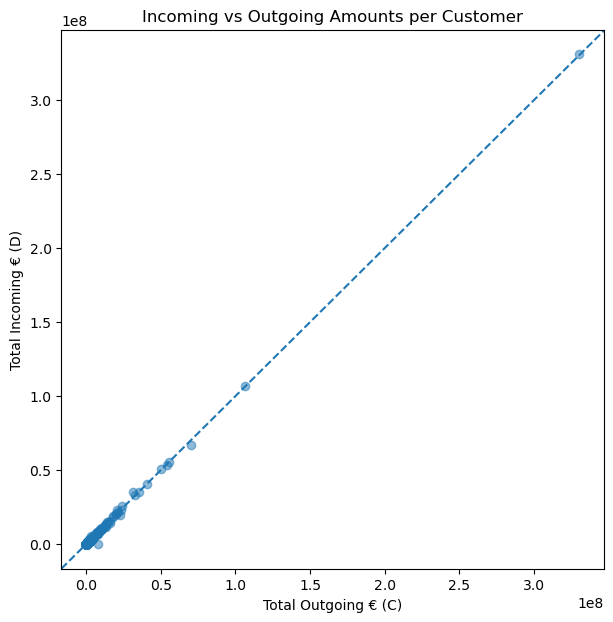

In [27]:
plt.figure(figsize=(7, 7))
plt.scatter(money_flow.get('C', 0), money_flow.get('D', 0), alpha=0.5)
plt.title("Incoming vs Outgoing Amounts per Customer")
plt.xlabel("Total Outgoing € (C)")
plt.ylabel("Total Incoming € (D)")
plt.axline((0, 0), slope=1, linestyle='--')  # line where in = out
plt.show()

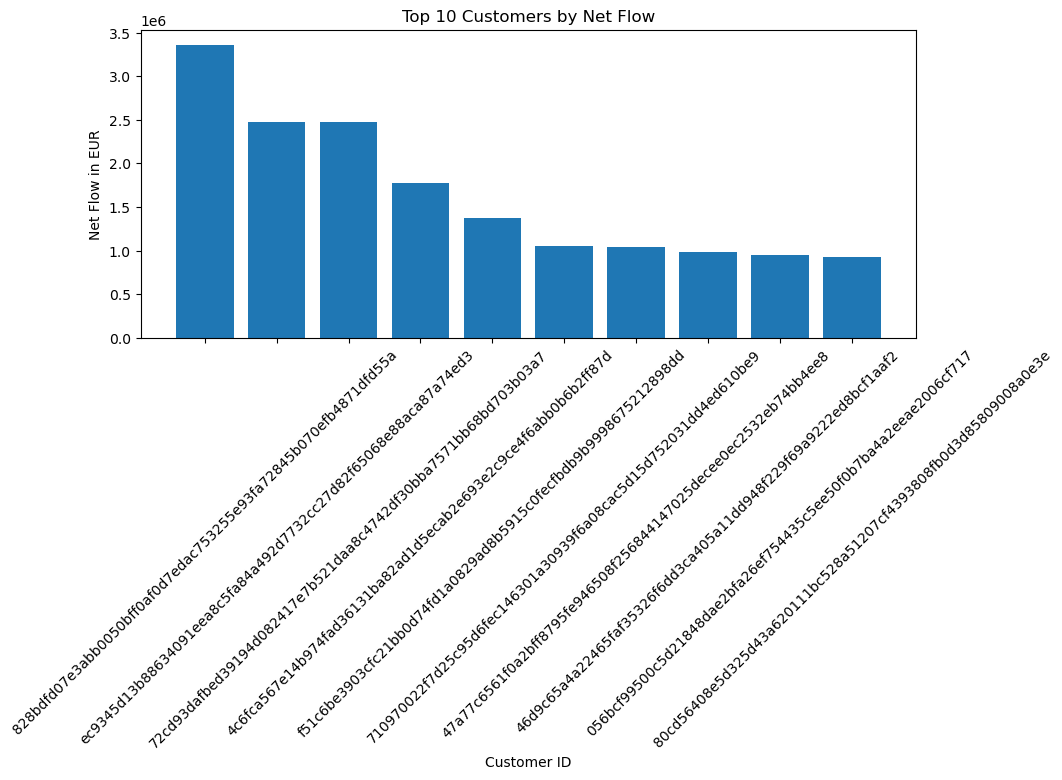

In [28]:
top10_net = money_flow.sort_values('Net_Flow', ascending=False).head(10)

plt.figure(figsize=(10, 4))
plt.bar(top10_net.index.astype(str), top10_net['Net_Flow'])
plt.title("Top 10 Customers by Net Flow")
plt.xlabel("Customer ID")
plt.ylabel("Net Flow in EUR")
plt.xticks(rotation=45)
plt.show()

#### Time based behaviour(?)

In [29]:
df_transaction.groupby(['Year', 'Month'])['Amount_EUR'].sum()

Year  Month
2023  1        1.266424e+08
      2        1.094020e+08
      3        1.622341e+08
      4        1.489158e+08
      5        1.624823e+08
      6        1.429226e+08
      7        1.428636e+08
      8        1.514987e+08
      9        1.574747e+08
      10       1.623241e+08
      11       1.524343e+08
      12       1.665943e+08
2024  1        1.354758e+08
      2        1.405050e+08
      3        1.503298e+08
      4        1.608755e+08
      5        1.587563e+08
      6        1.439192e+08
      7        1.568255e+08
      8        1.570979e+08
      9        1.563618e+08
      10       1.577577e+08
      11       1.602438e+08
      12       1.997697e+08
Name: Amount_EUR, dtype: float64

In [30]:
df_transaction.groupby('Hour').size()

Hour
0      31868
1      26732
2      91158
3      75598
4       3684
5      25904
6      46942
7      50986
8     155290
9     321776
10    260546
11    205804
12    182946
13    189186
14    179016
15    198098
16    120816
17     95482
18     53114
19     47462
20     63594
21     43070
22     35396
23     37548
dtype: int64

In [31]:
df_transaction.groupby(['WeekDay', 'D_C'])['Amount_EUR'].sum()

WeekDay  D_C
1        C      4.274918e+08
         D      4.009754e+08
2        C      3.230617e+08
         D      3.423862e+08
3        C      3.062444e+08
         D      3.133306e+08
4        C      3.259963e+08
         D      3.167035e+08
5        C      3.770323e+08
         D      3.707513e+08
6        C      3.023547e+07
         D      3.937799e+07
7        C      4.020121e+07
         D      4.991894e+07
Name: Amount_EUR, dtype: float64

#### Customer summary

In [35]:
customer_summary = df_transaction.groupby('cust_id').agg(
    num_txn=('Amount_EUR', 'count'),
    total_in=('Amount_EUR', lambda x: x[df_transaction.loc[x.index, 'D_C'] == 'D'].sum()),
    total_out=('Amount_EUR', lambda x: x[df_transaction.loc[x.index, 'D_C'] == 'C'].sum()),
    avg_txn_amt=('Amount_EUR', 'mean'),
    first_txn=('BookingDatetime', 'min'),
    last_txn=('BookingDatetime', 'max')
)

customer_summary['net_flow'] = customer_summary['total_in'] - customer_summary['total_out']

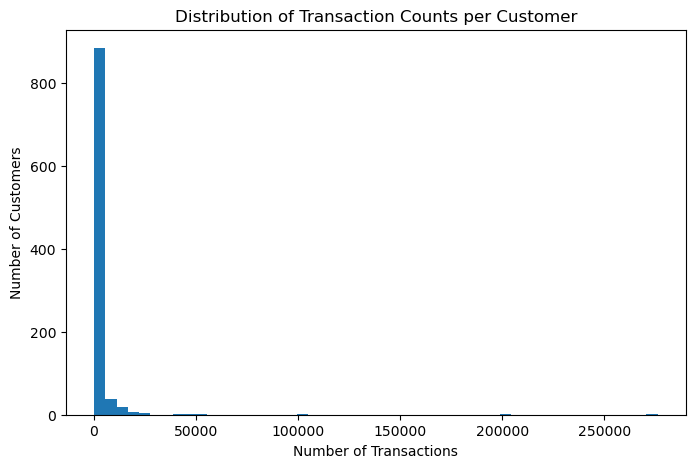

In [36]:
plt.figure(figsize=(8,5))
plt.hist(customer_summary['num_txn'], bins=50)
plt.title("Distribution of Transaction Counts per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()

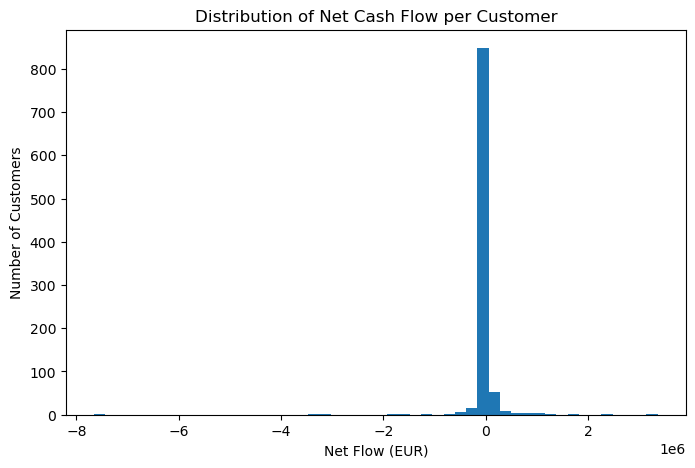

In [37]:
plt.figure(figsize=(8,5))
plt.hist(customer_summary['net_flow'], bins=50)
plt.title("Distribution of Net Cash Flow per Customer")
plt.xlabel("Net Flow (EUR)")
plt.ylabel("Number of Customers")
plt.show()

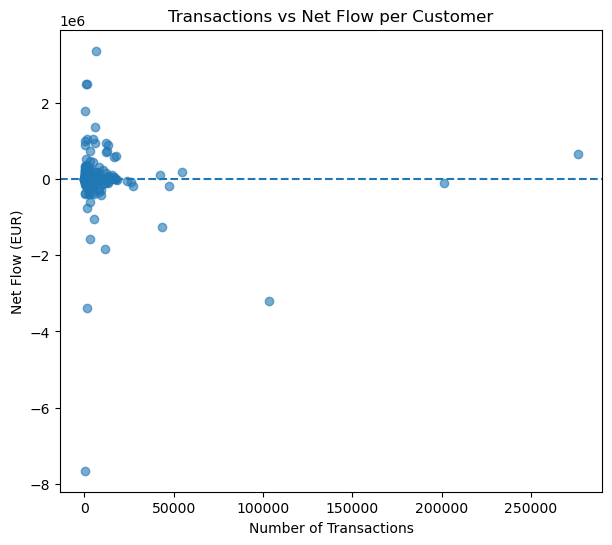

In [38]:
plt.figure(figsize=(7,6))
plt.scatter(customer_summary['num_txn'], customer_summary['net_flow'], alpha=0.6)
plt.title("Transactions vs Net Flow per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Net Flow (EUR)")
plt.axhline(0, linestyle='--')  # zero line
plt.show()

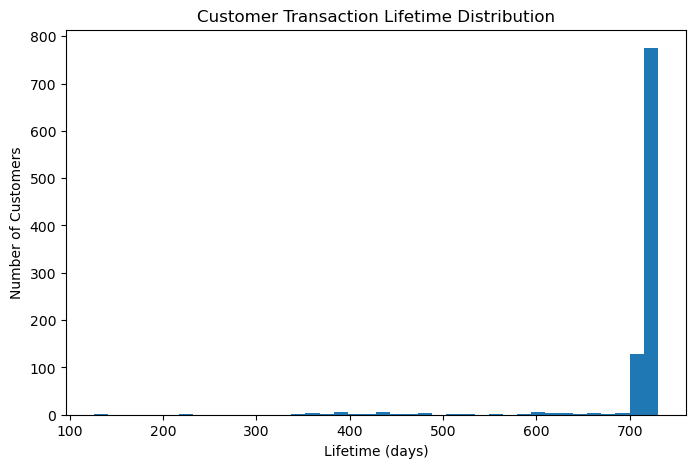

In [39]:
customer_summary['lifetime_days'] = (
    customer_summary['last_txn'] - customer_summary['first_txn']
).dt.days

plt.figure(figsize=(8,5))
plt.hist(customer_summary['lifetime_days'], bins=40)
plt.title("Customer Transaction Lifetime Distribution")
plt.xlabel("Lifetime (days)")
plt.ylabel("Number of Customers")
plt.show()

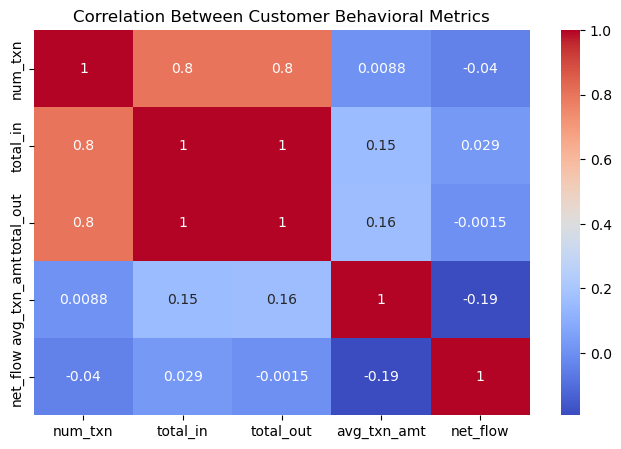

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(
    customer_summary[['num_txn','total_in','total_out','avg_txn_amt','net_flow']].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Between Customer Behavioral Metrics")
plt.show()

### Transform to true time series

In [42]:
df_transaction['BookingDatetime'] = pd.to_datetime(df_transaction['BookingDatetime'])

df_weekly = df_transaction.groupby([
    'cust_id', 
    pd.Grouper(key='BookingDatetime', freq='W')
]).agg(
    total_in=('Amount_EUR', lambda x: x[df_transaction.loc[x.index, 'D_C']=='D'].sum()),
    total_out=('Amount_EUR', lambda x: x[df_transaction.loc[x.index, 'D_C']=='C'].sum())
)

df_weekly['net_flow'] = df_weekly['total_in'] - df_weekly['total_out']
df_weekly = df_weekly.reset_index()
